In [152]:
import matplotlib.pyplot as plt
import numpy as np
import re
import matplotlib
%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

def density_scatter(x, y, bins=50, xlim=None, ylim=None, filename=None):
    fig = plt.figure(figsize=(10, 10))
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    plt.clf()
    plt.imshow(heatmap.T, extent=extent, origin='lower')
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)
    if filename is not None:
        plt.savefig(filename)
    plt.show()
    
import matplotlib.animation as animation

In [59]:
rays_y = np.loadtxt("rays_y_0.00.dat")

<IPython.core.display.Javascript object>


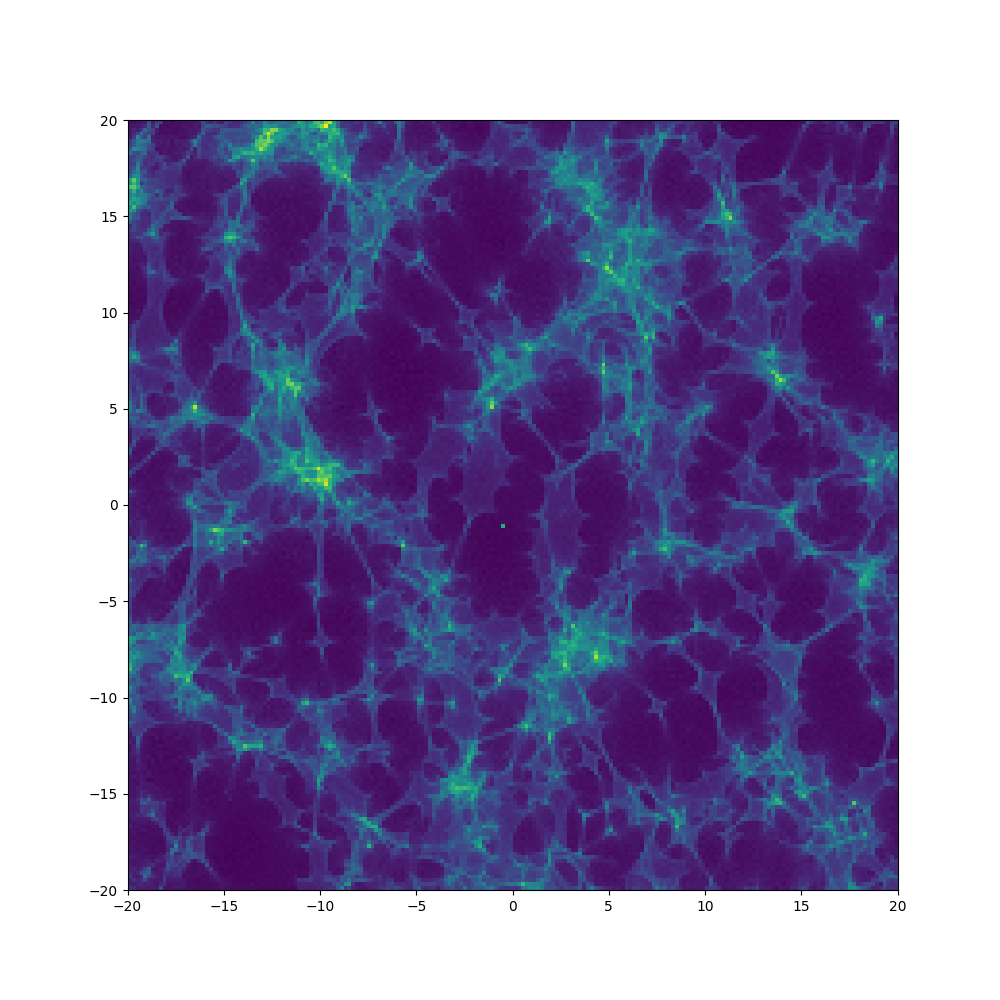

In [153]:
m = np.logical_and(np.abs(rays_y[:,0]) <= 20, np.abs(rays_y[:,1]) <= 20)
x = rays_y[:,0][m]
y = rays_y[:,1][m]
density_scatter(x, y, bins=[200, 200])

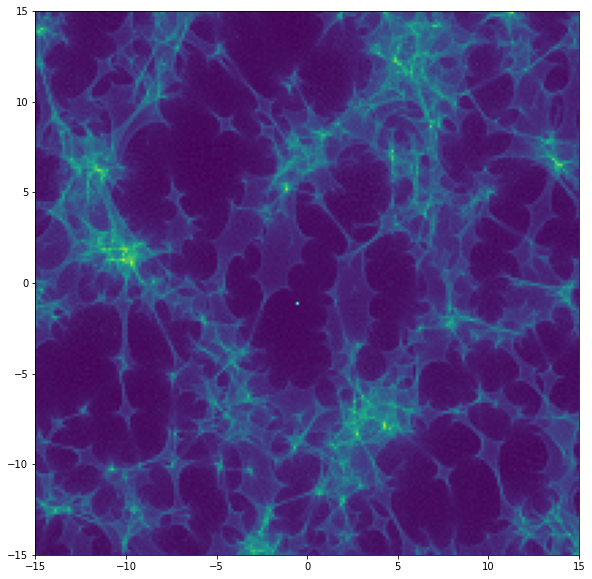

In [94]:
m = np.logical_and(np.abs(rays_y[:,0]) <= 15, np.abs(rays_y[:,1]) <= 15)
x = rays_y[:,0][m]
y = rays_y[:,1][m]
density_scatter(x, y, bins=[200, 200])

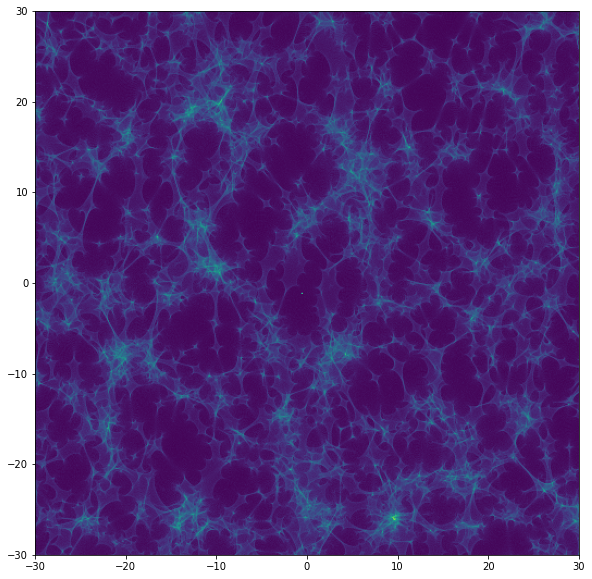

In [62]:
m = np.logical_and(np.abs(rays_y[:,0]) <= 30, np.abs(rays_y[:,1]) <= 30)
x = rays_y[:,0][m]
y = rays_y[:,1][m]
density_scatter(x, y, bins=[500, 500])

<IPython.core.display.Javascript object>


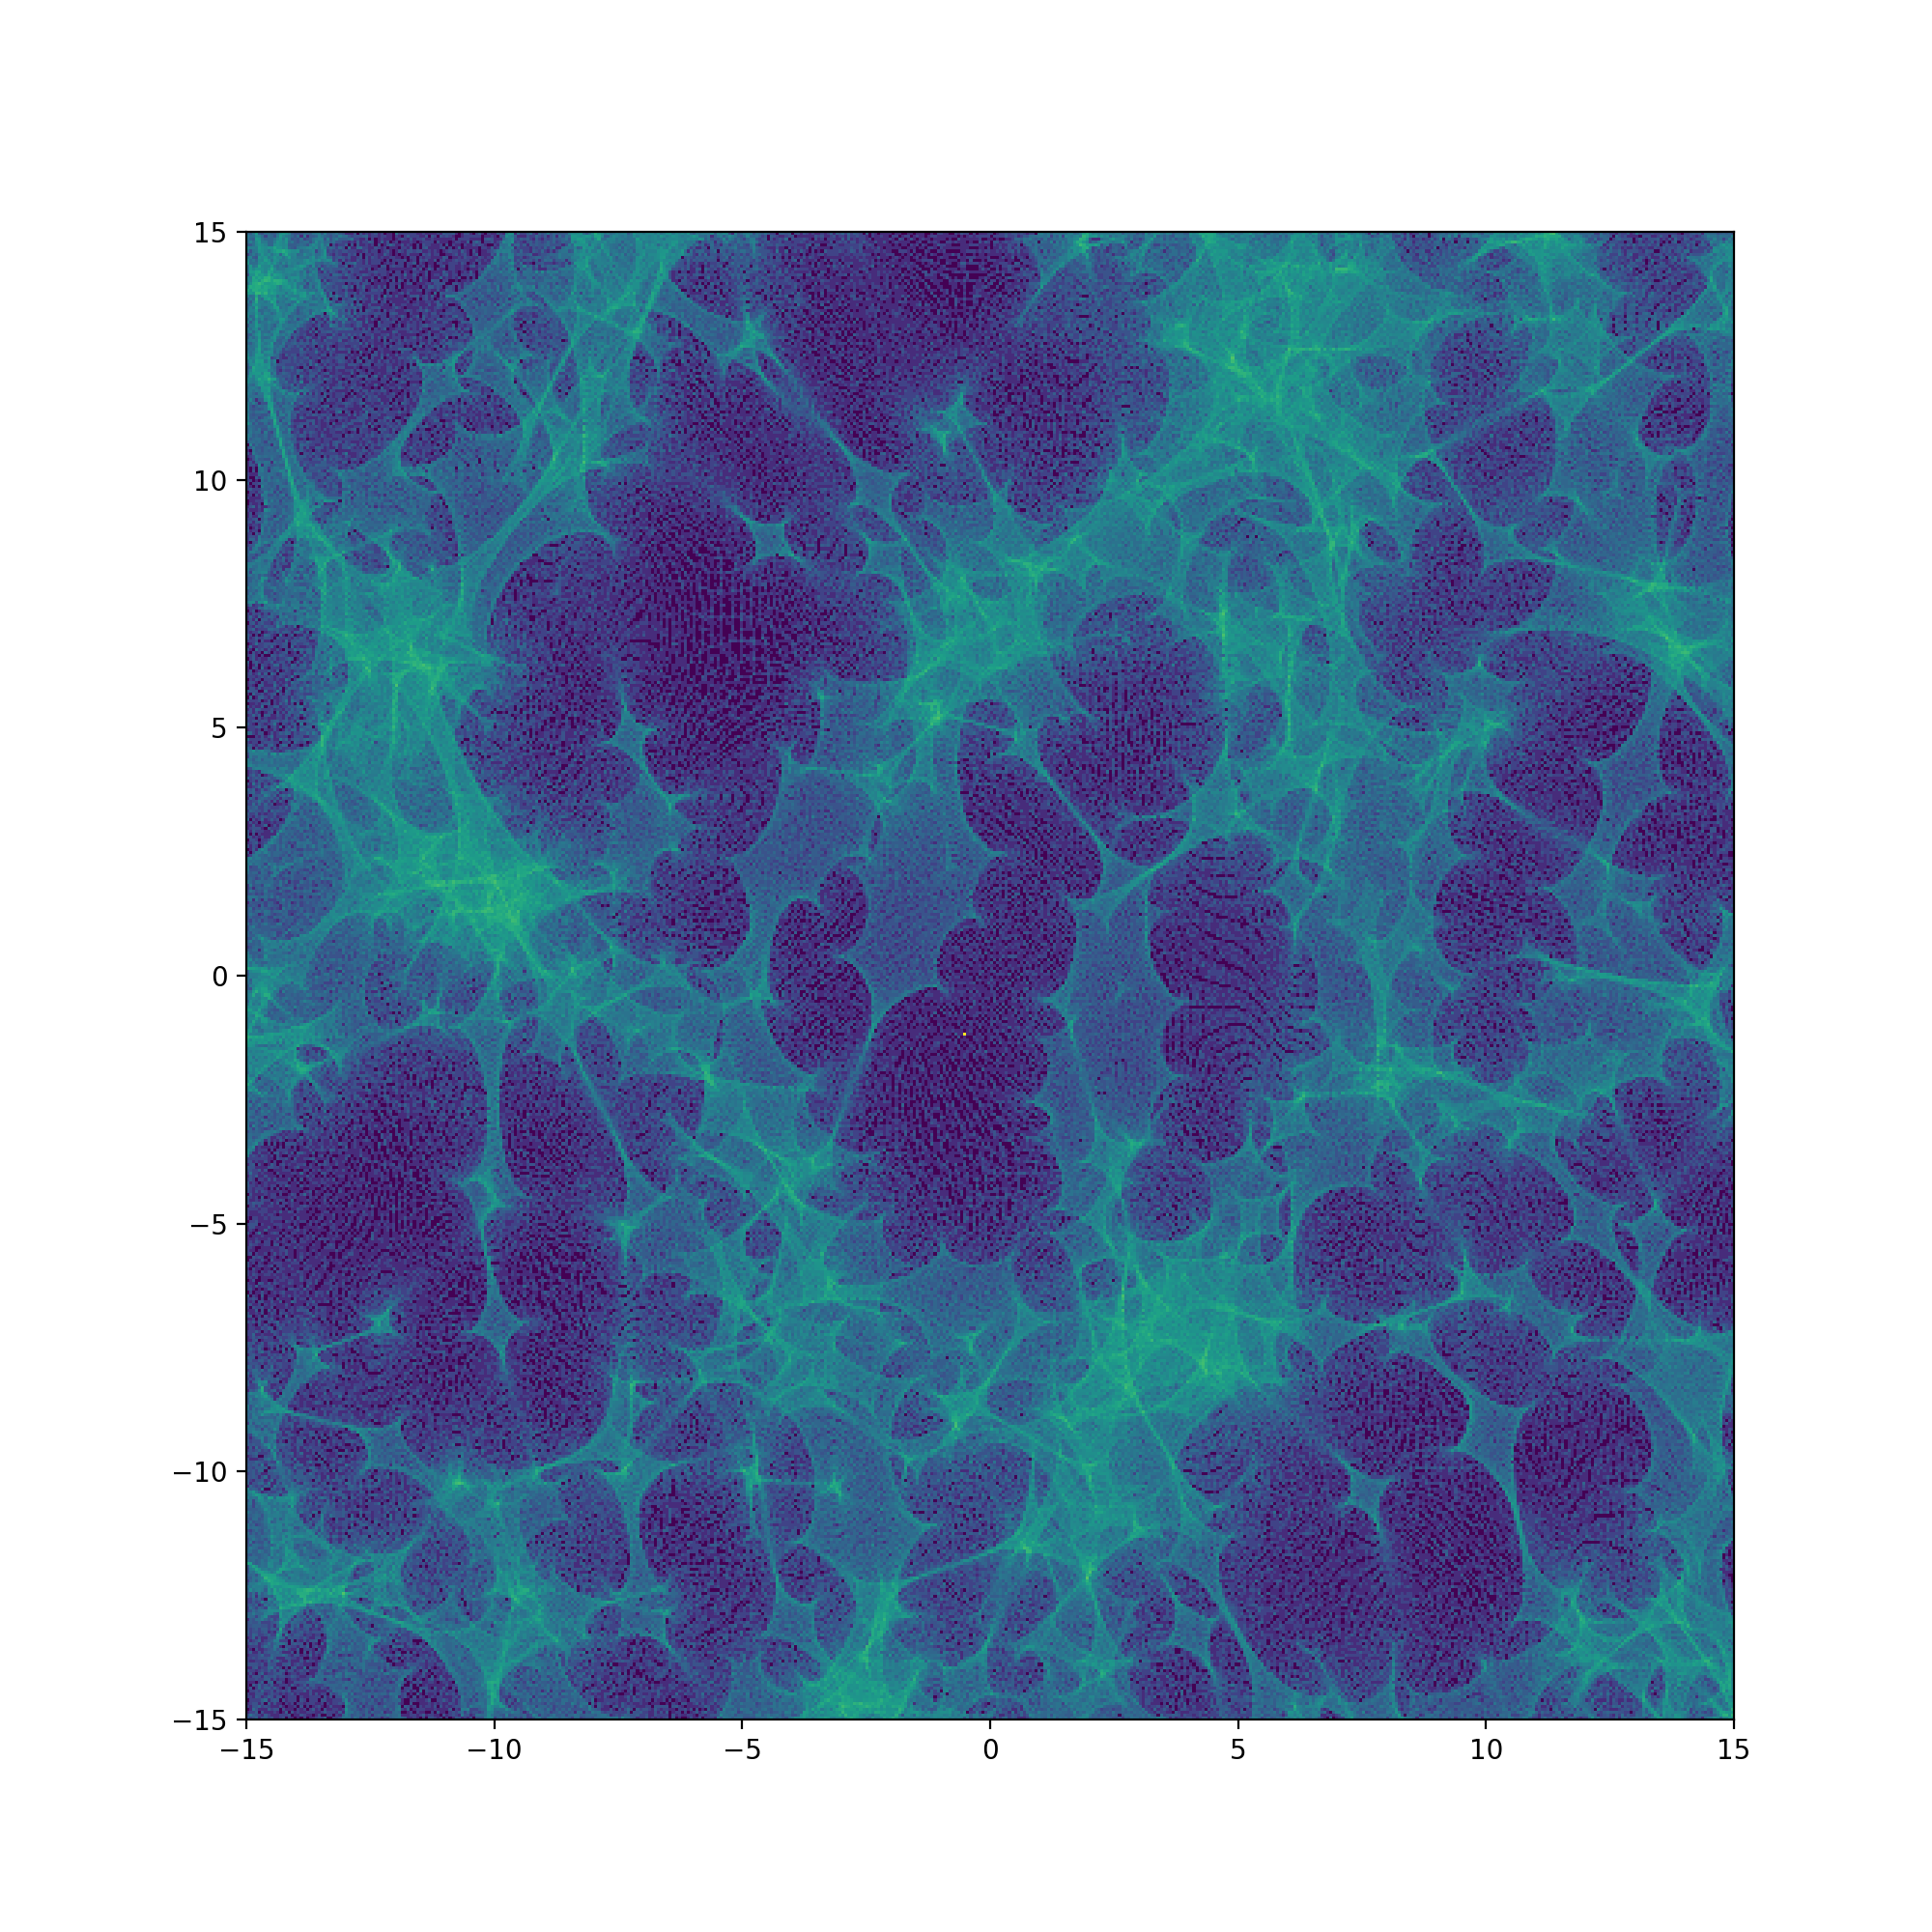

1589230.0

In [203]:
filename = "image_0.00.dat"
image = np.loadtxt(filename).reshape([500,500])
extent = None
with open(filename, 'r') as f:
    header1 = f.readline().strip()
    header2 = f.readline().strip()
    
    _x = re.split('\(|\,|\)', header1)
    _y = re.split('\(|\,|\)', header2)
    extent = [float(_x[1]),float(_x[2]),float(_y[1]),float(_y[2])]

fig = plt.figure(figsize=(10, 10))
im = np.zeros_like(image)
im[image > 0] = np.log(image[image > 0])
plt.imshow(im, extent=extent, origin='lower')
plt.show()

np.sum(image)

<IPython.core.display.Javascript object>


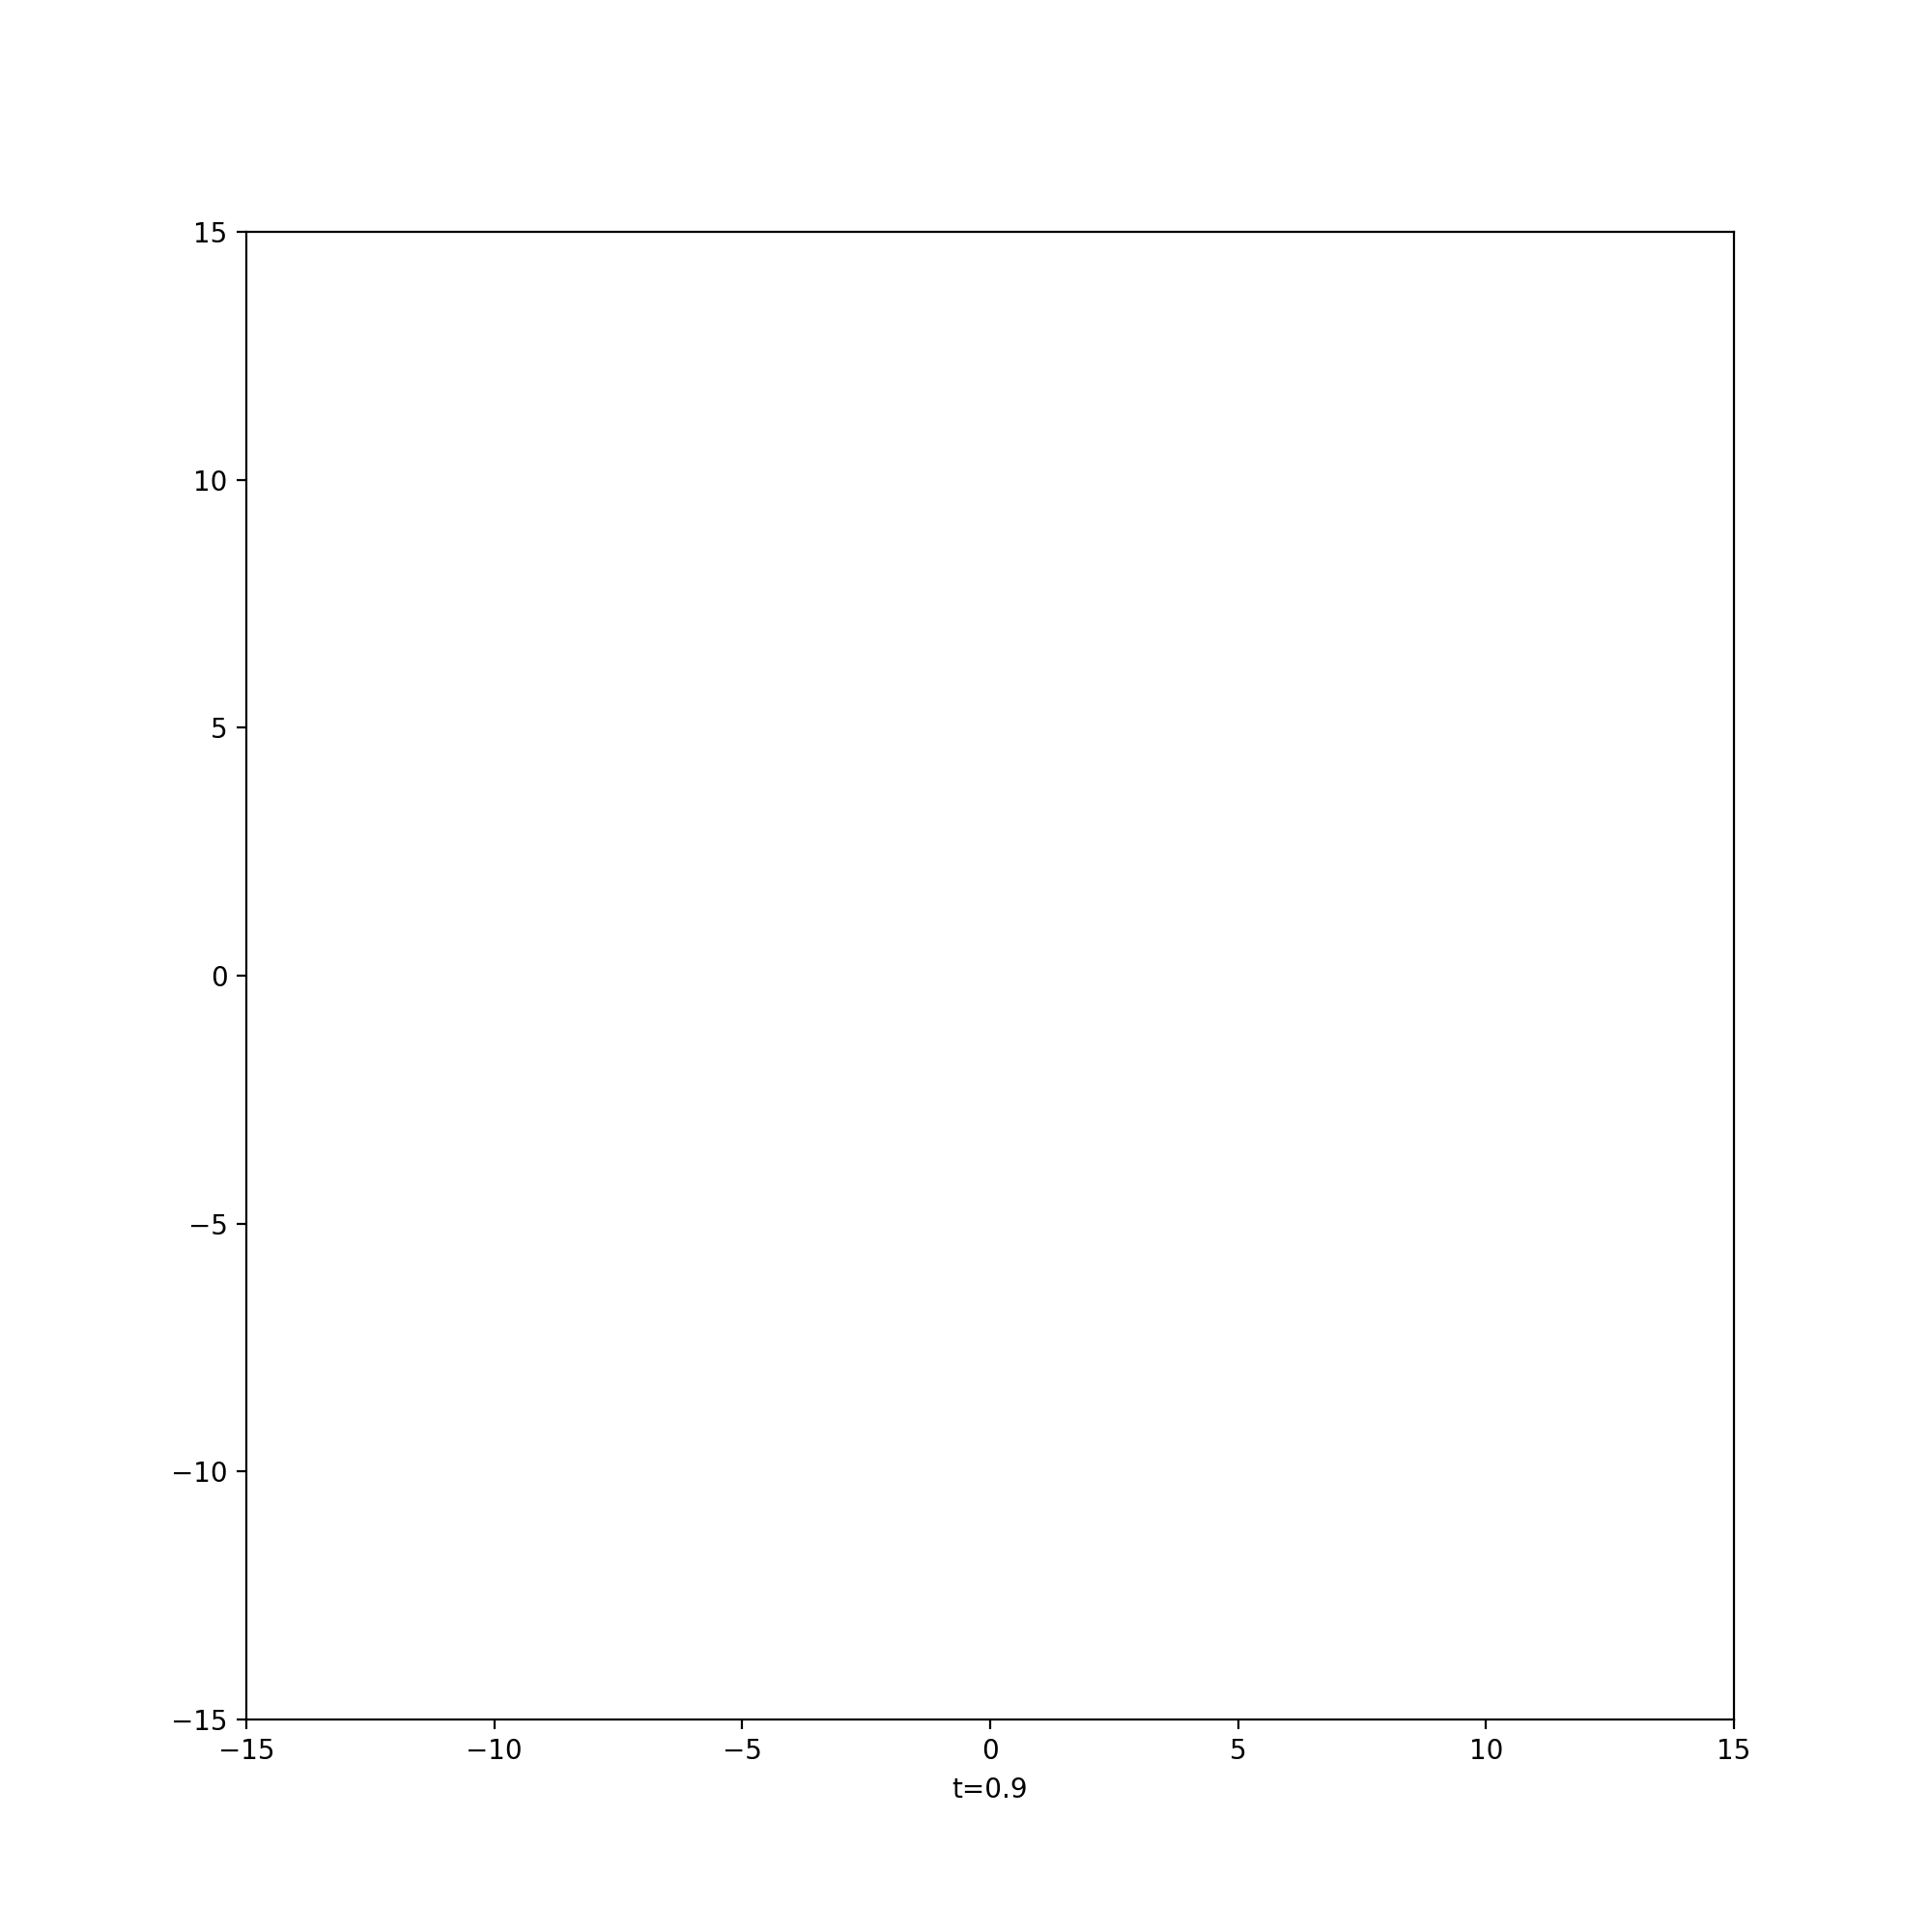

image_0.00.dat 1589230.0
image_0.10.dat 1589568.0
image_0.20.dat 1589436.0
image_0.30.dat 1588912.0
image_0.40.dat 1588166.0
image_0.50.dat 1587359.0
image_0.60.dat 1586577.0
image_0.70.dat 1585731.0
image_0.80.dat 1585138.0
image_0.90.dat 1584462.0


In [204]:
fig, ax = plt.subplots(figsize=(10,10))

ims = []

for i in np.arange(0, 1, 0.1):
    filename = "image_%.2f.dat" % i
    image = np.loadtxt(filename).reshape([500,500])
    print(filename, np.sum(image))
    extent = None
    with open(filename, 'r') as f:
        header1 = f.readline().strip()
        header2 = f.readline().strip()

        _x = re.split('\(|\,|\)', header1)
        _y = re.split('\(|\,|\)', header2)
        extent = [float(_x[1]),float(_x[2]),float(_y[1]),float(_y[2])]

    img = np.zeros_like(image)
    img[image > 0] = np.log(image[image > 0])
    im = ax.imshow(img, extent=extent, origin='lower')
    ax.set_xlabel("t=%s" % i)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=200, blit=False, repeat_delay=1000)

# To save the animation, use e.g.

ani.save("moving_stars.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()